In [2]:
#ROHIT MORE TECOB237
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('Social_Network_Ads.csv')

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [7]:
df.shape

(400, 5)

In [8]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [11]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [12]:
df.drop('User ID', axis=1, inplace=True)

In [13]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [14]:
df.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


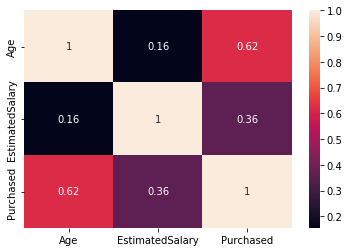

In [16]:
sns.heatmap(df.corr(), annot=True)

In [18]:
X=df.drop(['Gender', 'Purchased'], axis=1)
Y=df['Purchased']

In [20]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [21]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

# Split Data into train and test set

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2)

In [24]:
X_train.shape

(320, 2)

In [23]:
X_test.shape

(80, 2)

# Without Normalization of Dataset
Build the model


In [25]:
from sklearn.linear_model import LogisticRegression
basemodel=LogisticRegression()
basemodel.fit(X_train, y_train)
print("Accuracy of training is ", basemodel.score(X_train, y_train)*100)

Accuracy of base model is  64.375


Test the model

In [27]:
y_predict=basemodel.predict(X_test)
print("Accuracy of testing is ", basemodel.score(X_test, y_test)*100)

Accuracy of testing is  63.74999999999999


# With Normalization of Dataset

Apply Min-Max Normalization technique 

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [30]:
X=df[['Age', 'EstimatedSalary']]
y=df['Purchased']
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.02380952, 0.02962963],
       [0.4047619 , 0.03703704],
       [0.19047619, 0.20740741],
       [0.21428571, 0.31111111],
       [0.02380952, 0.45185185],
       [0.21428571, 0.31851852],
       [0.21428571, 0.51111111],
       [0.33333333, 1.        ],
       [0.16666667, 0.13333333],
       [0.4047619 , 0.37037037],
       [0.19047619, 0.48148148],
       [0.19047619, 0.27407407],
       [0.04761905, 0.52592593],
       [0.33333333, 0.02222222],
       [0.        , 0.4962963 ],
       [0.26190476, 0.48148148],
       [0.69047619, 0.07407407],
       [0.64285714, 0.08148148],
       [0.66666667, 0.0962963 ],
       [0.71428571, 0.1037037 ],
       [0.64285714, 0.05185185],
       [0.69047619, 0.25185185],
       [0.71428571, 0.19259259],
       [0.64285714, 0.05185185],
       [0.66666667, 0.05925926],
       [0.69047619, 0.03703704],
       [0.73809524, 0.0962963 ],
       [0.69047619, 0.11111111],
       [0.26190476, 0.20740741],
       [0.30952381, 0.02222222],
       [0.

In [31]:
x_train, x_test, Y_train, Y_test=train_test_split(X_scaled, y, test_size=0.2)

Build the model

In [32]:
model=LogisticRegression()
model.fit(x_train, Y_train)
print("Accuracy of training is ", model.score(x_train, Y_train)*100)

Accuracy of training is  83.125


Test the model

In [33]:
Y_predict=model.predict(x_test)
print("Accuracy of testing is ", model.score(x_test, Y_test)*100)

Accuracy of testing is  81.25


# Confusion-Matrix, Recall and Precision for Normalized Dataset

In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, Y_predict)
print(cm)

[[50  3]
 [12 15]]


In [37]:
from sklearn.metrics import classification_report
cr=classification_report(Y_test, Y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        53
           1       0.83      0.56      0.67        27

    accuracy                           0.81        80
   macro avg       0.82      0.75      0.77        80
weighted avg       0.82      0.81      0.80        80

